# About The DataSet
The dataset and working belongs to getting started in NLP
Content:- The dataset contains email received. The dataset contains two columns Text and Spam.

v2 :- Text / Email received.

v1:- Whether the email received is spam/ham(legitimate)
Class 0: HAM (Legitimate)
Class 1: SPAM

Goal:- Using NLP we have to build a model for future mails that can classify into spam/ham

Terms used in NLP ['Tokenization','Stemming',TF-IDF','stopwords','corpus']

In [1]:
import pandas as pd
df = pd.read_csv('spam.csv', encoding = 'cp1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
df = df.iloc[::,[0,1]]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.size

11144

In [5]:
df['v2'][6]  # sentence

'Even my brother is not like to speak with me. They treat me like aids patent.'

#### I want to give some relevant names to my columns

In [6]:
df = df.rename(columns = {'v1':'label' , 'v2':'message'})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

# Categoric into Numeric

spam = 0

ham = 1

In [9]:
df.label.replace({'spam':0 , 'ham':1},inplace = True) 

In [10]:
df.label.value_counts()

1    4825
0     747
Name: label, dtype: int64

In [11]:
# data preparation starts now
df.message = df.message.str.lower()
df.head()

,label,message
0,1,"go until jurong point, crazy.. available only ..."
1,1,ok lar... joking wif u oni...
2,0,free entry in 2 a wkly comp to win fa cup fina...
3,1,u dun say so early hor... u c already then say...
4,1,"nah i don't think he goes to usf, he lives aro..."


In [12]:
import nltk

In [13]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
len(stopwords.words('english'))

179

In [16]:
import string
string.punctuation  # only a special characters

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### I will remove the stopwords , punctuation , tokenization (assign id to each word)

#### create a TDM the do sampling build the model do the prediction

In [17]:
def text_process(mess):
    '''
    1. remove the punctuation
    2. remove the stopwords
    3. return the list of clean textwords
    
    '''
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc =  ''.join(nopunc)
    return[word for word in nopunc.split() if word not in stopwords.words('english')]

In [18]:
df.message.apply(text_process) # it is not save

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å£750, po...
5568                   [ì, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: message, Length: 5572, dtype: object

#### to save the changes I use count vectorizer and save it to our new variable
#### countvectorizer tells hows many time my words is repeating in the dataset

In [19]:
after_transformation = CountVectorizer(analyzer = text_process).fit(df['message'])
after_transformation.vocabulary

<IPython.core.display.Javascript object>

In [20]:
len(after_transformation.vocabulary_)

9431

In [21]:
tdm_spamdata = after_transformation.transform(df['message'])
tdm_spamdata # TDM will act as my X values

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [22]:
type(tdm_spamdata)

scipy.sparse.csr.csr_matrix

In [23]:
tdm_spamdata.shape

(5572, 9431)

In [24]:
abc = tdm_spamdata.toarray()
abc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
df1 = pd.DataFrame(abc)
df1  # 0 and 1

,0,1,2,3,4,5,6,7,8,9,...,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label , test_size=.2)

In [27]:
train_X.shape

(4457, 9431)

In [28]:
test_X.shape

(1115, 9431)

# Model Building  

#### some rules
##### Accuracy : higher the accuracy better the model
##### TPR(recalll) : higher the recall better the model
##### FPR lower the fpr better the model
##### Precision : higher the precision better the model
##### F1 : Higher the F! better the model

In [29]:
df.label.value_counts()

1    4825
0     747
Name: label, dtype: int64

As I can see that this data is huge imbalanced so I need to balanced the data with the help of stratified sampling . I can use under or oversampling also but I can see that the data of 0 and 1 is approx 1:7 Ratio 

In [30]:
747/(4825+747)

0.13406317300789664

In [31]:
1-0.13406317300789664

0.8659368269921034

In [32]:
4825/747

6.459170013386881

In [33]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(tdm_spamdata , df.label ,stratify=df.label, test_size=.2)

In [34]:
train_X.shape

(4457, 9431)

In [35]:
train_y.value_counts()

1    3859
0     598
Name: label, dtype: int64

In [36]:
test_y.value_counts()

1    966
0    149
Name: label, dtype: int64

In [37]:
598/3859

0.1549624254988339

In [38]:
149/966

0.15424430641821946

#### so I can see that ratio between 1 and 0 in train_y and test_y is same ..it means the problem of data imbalanced is solved now

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import accuracy_score,precision_score ,roc_auc_score, recall_score , f1_score , confusion_matrix
confusion_matrix(test_y , pred_y)

array([[120,  29],
       [  1, 965]], dtype=int64)

In [40]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9730941704035875
recall_score: 0.9989648033126294
precision: 0.9708249496981891
roc_curve: 0.9021669654147038
f1_score: 0.9846938775510203


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

              precision    recall  f1-score   support

           0       0.99      0.81      0.89       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



<AxesSubplot:>

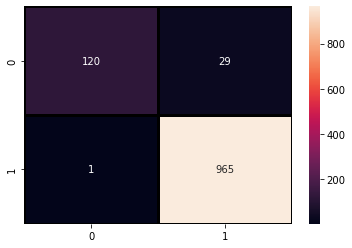

In [42]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y) , 
            annot = True , fmt = 'd' , linecolor = 'k', linewidth = 3 )
# line width = boundary of width
# line color = color of boundary
# fmt = 09.63+e**2 ko 963 me likhta hai

In [43]:
# CROSS VALIDATION OF LOGISTIC REGRESSSION
lr_grid = {'solver':['newton_cg','lbfgs','liblinear','sag','saga'],
          'penalty':['elasticnet','l1','l2']}
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr , param_grid = lr_grid)
grid_lr.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['elasticnet', 'l1', 'l2'],
                         'solver': ['newton_cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [44]:
grid_lr.best_params_

{'penalty': 'l2', 'solver': 'sag'}

In [45]:
lr = LogisticRegression(penalty = 'l2',solver = 'sag')
lr.fit(train_X , train_y)
pred_y = lr.predict(test_X)
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score,roc_auc_score,f1_score,recall_score
confusion_matrix(test_y , pred_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[122,  27],
       [  1, 965]], dtype=int64)

In [46]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9748878923766816
recall_score: 0.9989648033126294
precision: 0.9727822580645161
roc_curve: 0.908878374810677
f1_score: 0.9856996935648621


              precision    recall  f1-score   support

           0       0.99      0.82      0.90       149
           1       0.97      1.00      0.99       966

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



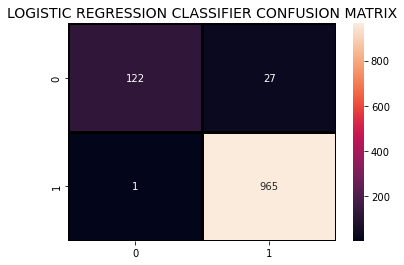

In [47]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# K NEAREST NEIGHBOURS

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[ 44, 105],
       [  0, 966]], dtype=int64)

In [49]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.905829596412556
recall_score: 1.0
precision: 0.9019607843137255
roc_curve: 0.6476510067114094
f1_score: 0.9484536082474228


              precision    recall  f1-score   support

           0       1.00      0.30      0.46       149
           1       0.90      1.00      0.95       966

    accuracy                           0.91      1115
   macro avg       0.95      0.65      0.70      1115
weighted avg       0.92      0.91      0.88      1115



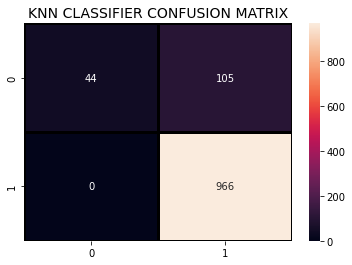

In [50]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [51]:
# CROSS VALIDATION OF KNN
parameter_dict={'n_neighbors':[1,11,21,31,41,51,75,101]}
from sklearn.model_selection import GridSearchCV
grid_df=GridSearchCV(knn,param_grid=parameter_dict)
grid_df.fit(train_X , train_y)
grid_df.best_params_

{'n_neighbors': 1}

In [52]:
knn=KNeighborsClassifier(n_neighbors=1,weights='uniform')
knn.fit(train_X , train_y)
pred_y = knn.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[ 82,  67],
       [  0, 966]], dtype=int64)

In [53]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9399103139013453
recall_score: 1.0
precision: 0.9351403678606002
roc_curve: 0.7751677852348993
f1_score: 0.9664832416208103


              precision    recall  f1-score   support

           0       1.00      0.55      0.71       149
           1       0.94      1.00      0.97       966

    accuracy                           0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115



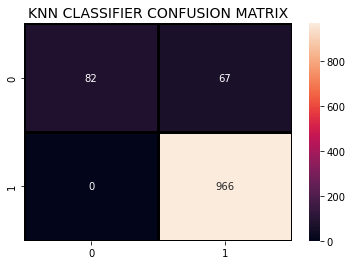

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("KNN CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# DECISION TREE CLASSIFIER

In [55]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[108,  41],
       [ 10, 956]], dtype=int64)

In [56]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9542600896860987
recall_score: 0.989648033126294
precision: 0.958876629889669
roc_curve: 0.8572401239456975
f1_score: 0.9740193581253185


In [57]:
# CROSS VALIDATION OF DECISION TREE CLASSIFIER
parameter_dict={'criterion':['gini','entropy'],'max_depth':[1,30,4],
    'min_samples_split':[1,2,3,4,5]}
grid_model=GridSearchCV(dt,param_grid=parameter_dict)
grid_model.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 30, 4],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [58]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 5}

In [59]:
dt=DecisionTreeClassifier(criterion='entropy' , max_depth=30 , min_samples_split=5)
dt.fit(train_X , train_y)
pred_y=dt.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[106,  43],
       [ 10, 956]], dtype=int64)

In [60]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9524663677130045
recall_score: 0.989648033126294
precision: 0.9569569569569569
roc_curve: 0.8505287145497241
f1_score: 0.9730279898218829


              precision    recall  f1-score   support

           0       0.91      0.71      0.80       149
           1       0.96      0.99      0.97       966

    accuracy                           0.95      1115
   macro avg       0.94      0.85      0.89      1115
weighted avg       0.95      0.95      0.95      1115



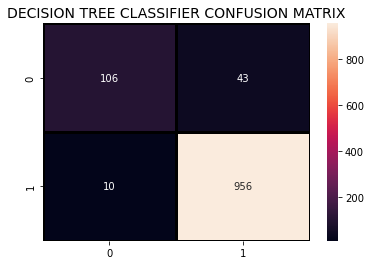

In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("DECISION TREE CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# BAGGING CLASSIFIER

In [62]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier( n_estimators=100,bootstrap=True,oob_score=True,random_state=42)
bg.fit(train_X , train_y)
pred_y=bg.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[106,  43],
       [  4, 962]], dtype=int64)

In [63]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.957847533632287
recall_score: 0.9958592132505176
precision: 0.9572139303482587
roc_curve: 0.853634304611836
f1_score: 0.9761542364282091


In [64]:
#CROSS VALIDATION OF BAGGING CLASSIFIER
from sklearn.model_selection import GridSearchCV
param_grid_bagging = {'n_estimators':list(range(1,100,10))}
grid = GridSearchCV(bg , param_grid=param_grid_bagging)
grid.fit(train_X , train_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This prob

GridSearchCV(estimator=BaggingClassifier(n_estimators=100, oob_score=True,
                                         random_state=42),
             param_grid={'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81,
                                          91]})

In [65]:
grid.best_params_

{'n_estimators': 21}

In [90]:
bg = BaggingClassifier(n_estimators=21 , bootstrap=True , oob_score=True)
bg.fit(train_X , train_y)
pred_y = bg.predict(test_X)
confusion_matrix(test_y , pred_y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


array([[104,  45],
       [  8, 958]], dtype=int64)

In [91]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9524663677130045
recall_score: 0.9917184265010351
precision: 0.9551345962113659
roc_curve: 0.8448525018411216
f1_score: 0.9730827831386489


              precision    recall  f1-score   support

           0       0.93      0.70      0.80       149
           1       0.96      0.99      0.97       966

    accuracy                           0.95      1115
   macro avg       0.94      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115



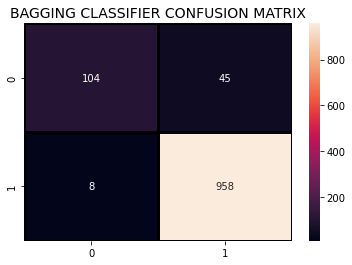

In [92]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("BAGGING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# RANDOM FOREST CLASSIFIER

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(train_X , train_y)
pred_y = rf.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[102,  47],
       [  0, 966]], dtype=int64)

In [70]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.957847533632287
recall_score: 1.0
precision: 0.9536031589338598
roc_curve: 0.8422818791946309
f1_score: 0.9762506316321374


              precision    recall  f1-score   support

           0       1.00      0.68      0.81       149
           1       0.95      1.00      0.98       966

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



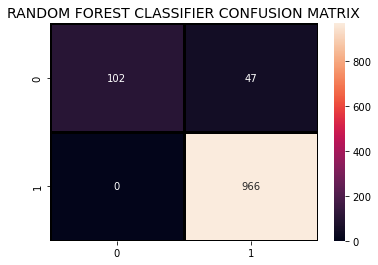

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("RANDOM FOREST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# SUPPORT VECTOR CLASSIFIER

In [72]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[113,  36],
       [  0, 966]], dtype=int64)

In [73]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.967713004484305
recall_score: 1.0
precision: 0.9640718562874252
roc_curve: 0.8791946308724833
f1_score: 0.9817073170731708


              precision    recall  f1-score   support

           0       1.00      0.76      0.86       149
           1       0.96      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



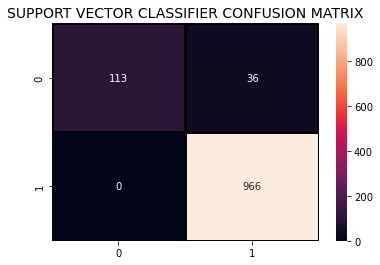

In [74]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

In [75]:
# CROSS VALIDATION WITH SVC
from sklearn.model_selection import GridSearchCV
param_dict = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'C' : list(range(1,10,1))}
svm_grid = GridSearchCV(svm , param_grid = param_dict)
svm_grid = svm_grid.fit(train_X , train_y)
svm_grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [76]:
svm= SVC(C=1 , kernel = 'linear')
svm.fit(train_X , train_y)
pred_y=svm.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[119,  30],
       [  1, 965]], dtype=int64)

In [77]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9721973094170404
recall_score: 0.9989648033126294
precision: 0.9698492462311558
roc_curve: 0.8988112607167174
f1_score: 0.98419173890872


              precision    recall  f1-score   support

           0       0.99      0.80      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



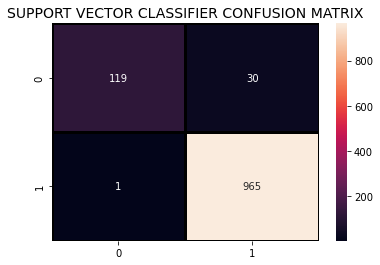

In [78]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("SUPPORT VECTOR CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

#  VOTING CLASSIFIER

In [79]:
from sklearn.ensemble import VotingClassifier
voting_clf=VotingClassifier([('svm',svm),('lr',lr),('knn',knn),('dt',dt),('rf',rf),('bg',bg)],voting='hard',n_jobs=5)
voting_clf.fit(train_X , train_y)
pred_y=voting_clf.predict(test_X)
confusion_matrix(test_y,pred_y)

array([[117,  32],
       [  0, 966]], dtype=int64)

In [80]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9713004484304932
recall_score: 1.0
precision: 0.9679358717434869
roc_curve: 0.8926174496644295
f1_score: 0.9837067209775967


              precision    recall  f1-score   support

           0       1.00      0.79      0.88       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



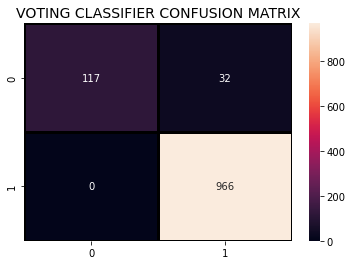

In [81]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("VOTING CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# XGBOOST CLASSIFIER

In [82]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(train_X , train_y)
pred_y = xgb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[115,  34],
       [  0, 966]], dtype=int64)

In [83]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9695067264573991
recall_score: 1.0
precision: 0.966
roc_curve: 0.8859060402684564
f1_score: 0.982706002034588


              precision    recall  f1-score   support

           0       1.00      0.77      0.87       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



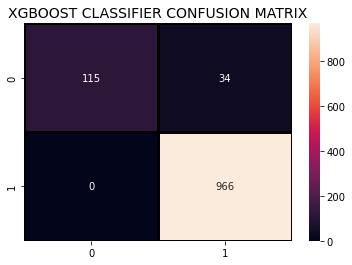

In [84]:
from sklearn.metrics import classification_report
print(classification_report(test_y , pred_y))
sns.heatmap(confusion_matrix(test_y , pred_y),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("XGBOOST CLASSIFIER CONFUSION MATRIX",fontsize=14)
plt.show()

# Naive Baised Classifier

In [85]:
# By bernoulli NB
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[119,  30],
       [  5, 961]], dtype=int64)

In [86]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.968609865470852
recall_score: 0.994824016563147
precision: 0.9697275479313825
roc_curve: 0.8967408673419762
f1_score: 0.9821154828819623


In [87]:
# By MultinomialNB
from sklearn.naive_bayes import MultinomialNB
bnb = MultinomialNB()
bnb.fit(train_X , train_y)
pred_y = bnb.predict(test_X)
confusion_matrix(test_y , pred_y)

array([[133,  16],
       [ 17, 949]], dtype=int64)

In [88]:
v = accuracy_score(test_y , pred_y)
w = recall_score(test_y , pred_y)
x = precision_score(test_y , pred_y)
y = roc_auc_score(test_y , pred_y)
z = f1_score(test_y , pred_y)
print('accuracy :',v)
print('recall_score:',w)
print('precision:',x)
print('roc_curve:',y)
print('f1_score:',z)

accuracy : 0.9704035874439462
recall_score: 0.9824016563146998
precision: 0.983419689119171
roc_curve: 0.9375095529895647
f1_score: 0.9829104091144484


### To check My Algorithm working good or not

In [93]:
list1 = ['This is to update that an exclusive session on SQL has been arranged with Ms. Supriya Jadhav as on 12th & 13th February (arranged for PGA 29,30,31,32 & 33)',
         'Here is another opportunity to showcase your creativity and explore the field of Data Science and work upon some really challenging problem statements on your own. We came up with the theme of a Data Science Project Competition across all Imarticus centers.']
X_new = after_transformation.transform(list1)
svm.predict(X_new)

array([1, 1], dtype=int64)

# CONCLUSION

## Here I can see that , according to mee Both SVM and CV_SVM shows me good result because if my mail is spam but it shows me spam so little bit count i'll accept but if my mail is HAM but it shows me spam so I'll not accept this so I'll go with SVM or CV_SVM. 